In [3]:
pip install numpy pandas matplotlib nltk collections sklearn re 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\gosc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
pip install wordcloud

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,precision_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import re
from wordcloud import WordCloud
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gosc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gosc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
# ham - 0, spam - 1 
data_0 = pd.read_csv('mail_spam_or_ham.csv')
data_1 = pd.read_csv('mail_data.csv')

In [6]:
# Modyfikacja ramki 'mail_spam_or_ham' pod zmienną data_0
data_0['type'] = data_0['type'].replace({'ham': 0, 'spam': 1})
print(data_0)

      type                                               text
0        0  Hope you are having a good week. Just checking in
1        0                            K..give back my thanks.
2        0        Am also doing in cbe only. But have to pay.
3        1  complimentary 4 STAR Ibiza Holiday or £10,000 ...
4        1  okmail: Dear Dave this is your final notice to...
...    ...                                                ...
5554     0  You are a great role model. You are giving so ...
5555     0  Awesome, I remember the last time we got someb...
5556     1  If you don't, your prize will go to another cu...
5557     1  SMS. ac JSco: Energy is high, but u may not kn...
5558     0                    Shall call now dear having food

[5559 rows x 2 columns]


In [7]:
# Modyfikacja ramki 'mail_data' pod zmienną data_1
# Zamiana nazw kolumn
data_1.rename(columns={'Category': 'type','Message': 'text'}, inplace = True)
# Zamina wartości ham i spam na 1 i 0
data_1['type'] = data_1['type'].replace({'ham':0,'spam':1})
# Zmiana początku i końca indeksu wierszy w celu ustalenia poprawnej numeracji ramki łączonej
data_1.set_index(pd.Index(range(5559,11131)), inplace=True)
print(data_1)

       type                                               text
5559      0  Go until jurong point, crazy.. Available only ...
5560      0                      Ok lar... Joking wif u oni...
5561      1  Free entry in 2 a wkly comp to win FA Cup fina...
5562      0  U dun say so early hor... U c already then say...
5563      0  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
11126     1  This is the 2nd time we have tried 2 contact u...
11127     0               Will ü b going to esplanade fr home?
11128     0  Pity, * was in mood for that. So...any other s...
11129     0  The guy did some bitching but I acted like i'd...
11130     0                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [8]:
# Łączenie ramek data_0 oraz data_1 
mail_data = pd.concat([data_0, data_1])

print(mail_data)

       type                                               text
0         0  Hope you are having a good week. Just checking in
1         0                            K..give back my thanks.
2         0        Am also doing in cbe only. But have to pay.
3         1  complimentary 4 STAR Ibiza Holiday or £10,000 ...
4         1  okmail: Dear Dave this is your final notice to...
...     ...                                                ...
11126     1  This is the 2nd time we have tried 2 contact u...
11127     0               Will ü b going to esplanade fr home?
11128     0  Pity, * was in mood for that. So...any other s...
11129     0  The guy did some bitching but I acted like i'd...
11130     0                         Rofl. Its true to its name

[11131 rows x 2 columns]


In [9]:
# Usuwanie pustych danych
print(mail_data.isnull().sum())
mail_data = mail_data.dropna(how = "any")
print(mail_data)

type    0
text    0
dtype: int64
       type                                               text
0         0  Hope you are having a good week. Just checking in
1         0                            K..give back my thanks.
2         0        Am also doing in cbe only. But have to pay.
3         1  complimentary 4 STAR Ibiza Holiday or £10,000 ...
4         1  okmail: Dear Dave this is your final notice to...
...     ...                                                ...
11126     1  This is the 2nd time we have tried 2 contact u...
11127     0               Will ü b going to esplanade fr home?
11128     0  Pity, * was in mood for that. So...any other s...
11129     0  The guy did some bitching but I acted like i'd...
11130     0                         Rofl. Its true to its name

[11131 rows x 2 columns]


In [10]:
# Pozbycie się duplikatów
print(mail_data.duplicated().sum())
mail_data = mail_data.drop_duplicates()
mail_data.set_index(pd.Index(range(0,5962)), inplace=True)
print(mail_data)

5169
      type                                               text
0        0  Hope you are having a good week. Just checking in
1        0                            K..give back my thanks.
2        0        Am also doing in cbe only. But have to pay.
3        1  complimentary 4 STAR Ibiza Holiday or £10,000 ...
4        1  okmail: Dear Dave this is your final notice to...
...    ...                                                ...
5957     0  I'm taking derek &amp; taylor to walmart, if I...
5958     0  No. I meant the calculation is the same. That ...
5959     0  if you aren't here in the next  &lt;#&gt;  hou...
5960     0               Will ü b going to esplanade fr home?
5961     0  The guy did some bitching but I acted like i'd...

[5962 rows x 2 columns]


0    5269
1     693
Name: type, dtype: int64


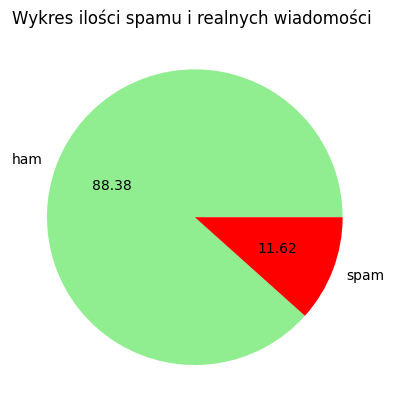

In [11]:
print(mail_data['type'].value_counts())
plt.pie(mail_data['type'].value_counts(), labels=['ham','spam'],autopct="%0.2f", colors = ['lightgreen', 'red'])
plt.title("Wykres ilości spamu i realnych wiadomości ")
plt.show()

# Transformacja tekst

In [12]:
# Zamiana na małe litery
mail_data['text'] = mail_data['text'].str.lower()
# Usunięcie liczb
mail_data['text'] = mail_data['text'].str.replace(r'\d+', '', regex=True)

# Zmienna pozwala na dzielenie na podstawie wzorca tekstu
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
def tokenize(text):
    tokenize_text = tokenizer.tokenize(text)
    return tokenize_text
    
mail_data['text'] = mail_data['text'].apply(tokenize)

In [13]:
mail_data

,type,text
0,0,"[hope, you, are, having, a, good, week, just, ..."
1,0,"[k, give, back, my, thanks]"
2,0,"[am, also, doing, in, cbe, only, but, have, to..."
3,1,"[complimentary, star, ibiza, holiday, or, cash..."
4,1,"[okmail, dear, dave, this, is, your, final, no..."
...,...,...
5957,0,"[i, m, taking, derek, amp, taylor, to, walmart..."
5958,0,"[no, i, meant, the, calculation, is, the, same..."
5959,0,"[if, you, aren, t, here, in, the, next, lt, gt..."
5960,0,"[will, ü, b, going, to, esplanade, fr, home]"


In [14]:
# Usuwanie znaków specjalnych
def special_characters(text_spec_char):
    text_spec_char = [re.sub(r'\W+', '', word) for word in text_spec_char]
    return text_spec_char

mail_data['text'] = mail_data['text'].apply(lambda x: special_characters(x))

In [15]:
print(mail_data)

      type                                               text
0        0  [hope, you, are, having, a, good, week, just, ...
1        0                        [k, give, back, my, thanks]
2        0  [am, also, doing, in, cbe, only, but, have, to...
3        1  [complimentary, star, ibiza, holiday, or, cash...
4        1  [okmail, dear, dave, this, is, your, final, no...
...    ...                                                ...
5957     0  [i, m, taking, derek, amp, taylor, to, walmart...
5958     0  [no, i, meant, the, calculation, is, the, same...
5959     0  [if, you, aren, t, here, in, the, next, lt, gt...
5960     0       [will, ü, b, going, to, esplanade, fr, home]
5961     0  [the, guy, did, some, bitching, but, i, acted,...

[5962 rows x 2 columns]


In [16]:
# Usunięcie wyrazów powszechnych
stopwords = stopwords.words('english')
def remove_stopwords(s_words):
    s_words = [word for word in s_words if word.lower() not in stopwords]
    return s_words
mail_data['text'] = mail_data['text'].apply(lambda x: remove_stopwords(x))

In [17]:
# Proces lematyzacji
ps = PorterStemmer()
mail_data['text'] = mail_data['text'].apply(lambda x: ' '.join([ps.stem(word) for word in x]))

In [18]:
mail_data['text'][5]

'aiya discuss later lar pick u'

In [19]:
mail_data['text'][5]

'aiya discuss later lar pick u'

# Dodatkowe informacje

In [20]:
temp_df = mail_data

In [21]:
print(temp_df['type'])

0       0
1       0
2       0
3       1
4       1
       ..
5957    0
5958    0
5959    0
5960    0
5961    0
Name: type, Length: 5962, dtype: int64


In [22]:
# Przygotowanie danych do wykresów
def zlicz_wystapienia_slow_w_ramce_danych(ramka_danych,nazwa_kolumny):
    # Pobieranie zawartości kolumny jako serii
    kolumna = ramka_danych[nazwa_kolumny]
    
    # Łączenie zawartości kolumny w jeden długi ciąg tekstowy
    tekst = ' '.join(kolumna.tolist())
    
    # Tworzenie listy wszystkich słów w tekście
    slowa = tekst.split()
    
    # Usuwanie słów, które nie są wyłącznie literami
    slowa = [slowo for slowo in slowa if slowo.isalpha()]
    
    # Utworzenie licznika wystąpień słów
    licznik = Counter(slowa)
    
    return licznik

# Zliczanie wystąpień słów w spamie i hamie
wynik_ham = zlicz_wystapienia_slow_w_ramce_danych(temp_df[temp_df['type'] == 0], 'text')
wynik_spam = zlicz_wystapienia_slow_w_ramce_danych(temp_df[temp_df['type'] == 1], 'text')

C:\Users\gosc\AppData\Local\Temp\ipykernel_15620\1606375037.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(df_ham['wyrazy'][:25], df_ham['ilosc_wystapien'][:25])


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'come'),
  Text(4, 0, 'like'),
  Text(5, 0, 'ok'),
  Text(6, 0, 'gt'),
  Text(7, 0, 'lt'),
  Text(8, 0, 'know'),
  Text(9, 0, 'got'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'love'),
  Text(13, 0, 'day'),
  Text(14, 0, 'good'),
  Text(15, 0, 'ur'),
  Text(16, 0, 'want'),
  Text(17, 0, 'need'),
  Text(18, 0, 'one'),
  Text(19, 0, 'home'),
  Text(20, 0, 'think'),
  Text(21, 0, 'lor'),
  Text(22, 0, 'see'),
  Text(23, 0, 'ü'),
  Text(24, 0, 'da')])

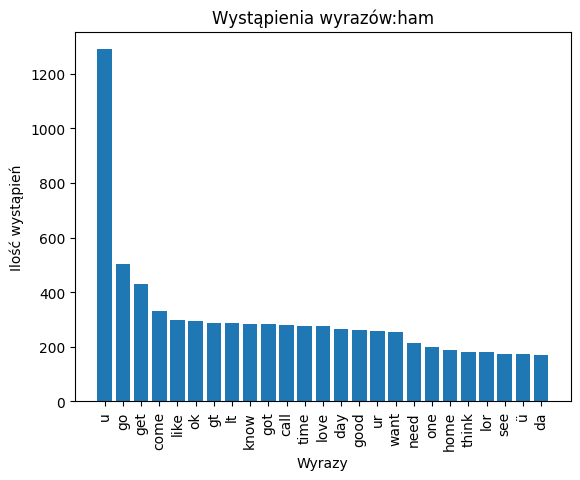

In [23]:
# Wykres przedstawiający ilość występowania danego wyrazu w przypadku autentycznej wiadomosci
words_ham = list(wynik_ham.keys())
count_ham = list(wynik_ham.values())

df_ham = pd.DataFrame({'ilosc_wystapien': count_ham,'wyrazy':words_ham})
df_ham = df_ham.sort_values(by='ilosc_wystapien', ascending = False)
plt.bar(df_ham['wyrazy'][:25], df_ham['ilosc_wystapien'][:25])
plt.title('Wystąpienia wyrazów:ham')
plt.xlabel('Wyrazy')
plt.ylabel('Ilość wystąpień')
plt.xticks(rotation=90)

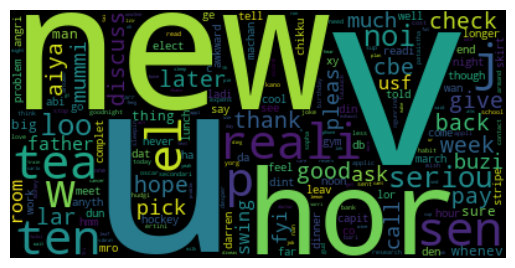

In [24]:
# Zamiana na text wyrazów ham
cloud_words_ham = str(list(wynik_ham.keys()))
for word in ["'","[",","]:
    cloud_words_ham = cloud_words_ham.replace(word,"")

# Generowanie chmury wyrazów
wordcloud = WordCloud().generate(cloud_words_ham)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

C:\Users\gosc\AppData\Local\Temp\ipykernel_15620\499660482.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(df_spam['wyrazy'][:25], df_spam['ilosc_wystapien'][:25])


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, 'u'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'p'),
  Text(5, 0, 'text'),
  Text(6, 0, 'mobil'),
  Text(7, 0, 'ur'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'claim'),
  Text(10, 0, 'repli'),
  Text(11, 0, 'www'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'min'),
  Text(15, 0, 'tone'),
  Text(16, 0, 'servic'),
  Text(17, 0, 'new'),
  Text(18, 0, 'uk'),
  Text(19, 0, 'cash'),
  Text(20, 0, 'send'),
  Text(21, 0, 'award'),
  Text(22, 0, 'nokia'),
  Text(23, 0, 'msg'),
  Text(24, 0, 'contact')])

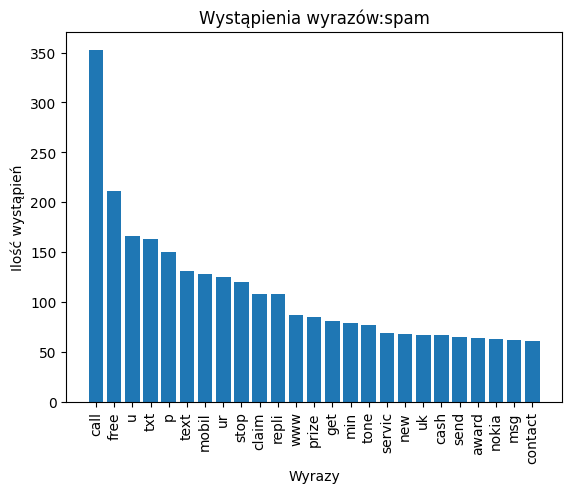

In [25]:
# Wykres przedstawiający ilość występowania danego wyrazu w przypadku autentycznej wiadomosci
words_spam = list(wynik_spam.keys())
count_spam = list(wynik_spam.values())

df_spam = pd.DataFrame({'ilosc_wystapien': count_spam,'wyrazy':words_spam})
df_spam = df_spam.sort_values(by='ilosc_wystapien', ascending = False)
plt.bar(df_spam['wyrazy'][:25], df_spam['ilosc_wystapien'][:25])
plt.title('Wystąpienia wyrazów:spam')
plt.xlabel('Wyrazy')
plt.ylabel('Ilość wystąpień')
plt.xticks(rotation=90)

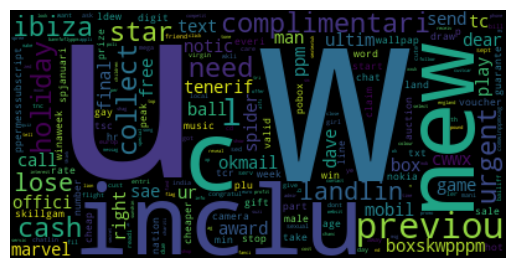

In [26]:
# Zamiana na text wyrazów spam
cloud_words_spam = str(list(wynik_spam.keys()))
for word in ["'","[",","]:
    cloud_words_spam = cloud_words_spam.replace(word,"")

# Generowanie chmury wyrazów
wordcloud = WordCloud().generate(cloud_words_spam)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Train and test

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(mail_data['text'],mail_data['type'],test_size=0.2, random_state = 3)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

In [29]:
X_train

5869    either way work lt gt year old hope doesnt bother
4797    wonder co dun rem see silver car thk saw black...
5482    boy love gal propsd bt didnt mind gv lv lttr b...
1784                    hi keen go kind feel go tomo mind
5920    someonon know tri contact via date servic find...
                              ...                        
789     wan win meet greet westlif u current tour unbr...
968                                           r u go send
1667     rington club gr new poli direct mobil everi week
3321    refus loan secur unsecur get credit call free ...
1688                                u go ikea str aft dat
Name: text, Length: 4769, dtype: object

# Model Naive Bayes

# Naive Bayes - MultinomialNB

In [30]:
from sklearn.naive_bayes import MultinomialNB
model_MB = MultinomialNB()
model_MB.fit(X_train_transformed, Y_train)
y_pred_MB = model_MB.predict(X_test_transformed)

# Naive Bayes - GaussianNB

In [31]:
from sklearn.naive_bayes import GaussianNB
model_GB = GaussianNB()
model_GB.fit(X_train_transformed.toarray(), Y_train)
y_pred_GB = model_GB.predict(X_test_transformed.toarray())

# Naive Bayes - Bernoulli

In [32]:
from sklearn.naive_bayes import BernoulliNB
model_BB = BernoulliNB()
model_BB.fit(X_train_transformed.toarray(), Y_train)
y_pred_BB = model_BB.predict(X_test_transformed.toarray())

# Model K-Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(10)
model_KNN.fit(X_train_transformed,Y_train) 
y_pred_KNN = model_KNN.predict(X_test_transformed)

# Model SVM 

In [34]:
from sklearn.svm import SVC
model_SVM = SVC(kernel='sigmoid', gamma=1.0)
model_SVM.fit(X_train_transformed,Y_train)
y_pred_SVM = model_SVM.predict(X_test_transformed)

# Sieci Neuronowe

In [ ]:
pip install tensorflow

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_NN = Sequential()
model_NN.add(Dense(16, activation='relu', input_shape=(X_train_transformed.shape[1],)))
model_NN.add(Dense(1, activation='sigmoid'))

model_NN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_NN.fit(X_train_transformed.toarray(), Y_train, epochs=10, batch_size=32)

# Predykcja na danych testowych
y_pred_NN = model_NN.predict(X_test_transformed.toarray())
# Zaokrąglanie do najbliższej wartości 0 lub 1
y_pred_NN = np.round(y_pred_NN).flatten()  
# Zamiana z float na int
y_pred_NN = list(map(int,y_pred_NN))

Epoch 1/10
150/150 [==============================] - 1s 3ms/step - loss: 0.5357 - accuracy: 0.8836
Epoch 2/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2517 - accuracy: 0.9367
Epoch 3/10
150/150 [==============================] - 0s 3ms/step - loss: 0.1264 - accuracy: 0.9721
Epoch 4/10
150/150 [==============================] - 0s 3ms/step - loss: 0.0776 - accuracy: 0.9847
Epoch 5/10
150/150 [==============================] - 0s 3ms/step - loss: 0.0540 - accuracy: 0.9887
Epoch 6/10
150/150 [==============================] - 0s 3ms/step - loss: 0.0403 - accuracy: 0.9914
Epoch 7/10
150/150 [==============================] - 1s 4ms/step - loss: 0.0314 - accuracy: 0.9943
Epoch 8/10
150/150 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9956
Epoch 9/10
150/150 [==============================] - 0s 2ms/step - loss: 0.0209 - accuracy: 0.9969
Epoch 10/10
38/38 [==============================] - 0s 1ms/step


# ExtraTreesClassifier

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
model_EXT = ExtraTreesClassifier()
model_EXT.fit(X_train_transformed,Y_train)
y_pred_EXT = model_EXT.predict(X_test_transformed)

## GradientBoostClassifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
model_GBC=GradientBoostingClassifier()
model_GBC.fit(X_train_transformed,Y_train)
y_pred_GBC = model_GBC.predict(X_test_transformed)

## XGradientBoostClassifier

In [41]:
pip install xgboost

  Using cached xgboost-1.7.5-py3-none-win_amd64.whl (70.9 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\gosc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [42]:
from xgboost import XGBClassifier
model_XGBC=XGBClassifier()
model_XGBC.fit(X_train_transformed,Y_train)
y_pred_XGBC = model_XGBC.predict(X_test_transformed)

## Adaboost

In [43]:
from sklearn.ensemble import AdaBoostClassifier
model_ABC=AdaBoostClassifier()
model_ABC.fit(X_train_transformed,Y_train)
y_pred_ABC = model_XGBC.predict(X_test_transformed)

## Przedstawienie wyników

In [44]:
models_name_list = ["MultinomialNB", "GaussianNB","BernouliNB", "K-NearstNeigbours", "SVM", "NeuralNetworks","ExtraTreeClassifier", "GradientBoostClassifier", "XGradientBoostClassifier", "AdaBoost"]
pred_models_list = [y_pred_MB,y_pred_GB,y_pred_BB,y_pred_KNN,y_pred_SVM,y_pred_NN,y_pred_EXT,y_pred_GBC,y_pred_XGBC,y_pred_ABC]

In [45]:
df_results = pd.DataFrame(columns = ["Accuracy", "Precision", "Recall", "F1-Score", "Ham_True", "Ham_False", "Spam_True", "Spam_False"])

In [46]:
def results(x):
    accuracy = accuracy_score(Y_test, x)
    precision = precision_score(Y_test, x)
    recall = recall_score(Y_test, x)
    f1 = f1_score(Y_test, x)
    confusion_mat = confusion_matrix(Y_test, x)
    no_spam_true, no_spam_false = confusion_mat[0][0], confusion_mat[0][1]
    yes_spam_true, yes_spam_false = confusion_mat[1][1], confusion_mat[1][0]
    return list(map(float,[accuracy,precision,recall,f1,no_spam_true,no_spam_false,yes_spam_true,yes_spam_false]))

In [49]:
for i in range(len(models_name_list)):
    df_results.loc[len(df_results)] = results(pred_models_list[i])
    df_results = df_results.rename(index={len(df_results)-1: models_name_list[i]})

In [50]:
df_results

,Accuracy,Precision,Recall,F1-Score,Ham_True,Ham_False,Spam_True,Spam_False
MultinomialNB,0.966471,1.000000,0.716312,0.834711,1052.0,0.0,101.0,40.0
GaussianNB,0.869237,0.470120,0.836879,0.602041,919.0,133.0,118.0,23.0
BernouliNB,0.982397,0.991803,0.858156,0.920152,1051.0,1.0,121.0,20.0
K-NearstNeigbours,0.894384,1.000000,0.106383,0.192308,1052.0,0.0,15.0,126.0
SVM,0.979883,0.946565,0.879433,0.911765,1045.0,7.0,124.0,17.0
NeuralNetworks,0.984074,0.955224,0.907801,0.930909,1046.0,6.0,128.0,13.0
ExtraTreeClassifier,0.982397,0.991803,0.858156,0.920152,1051.0,1.0,121.0,20.0
GradientBoostClassifier,0.968148,0.972477,0.751773,0.848000,1049.0,3.0,106.0,35.0
XGradientBoostClassifier,0.974015,0.958333,0.815603,0.881226,1047.0,5.0,115.0,26.0
AdaBoost,0.974015,0.958333,0.815603,0.881226,1047.0,5.0,115.0,26.0
